<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_05_ZerosFunciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 5
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods


In an IPython notebook, use the scipy implementation and find the first solution to the equation, write a function with the bisection methods.

What is the solution if a=1, and b=1, what is the solution if a=2 and b=2
  
1. $ 7 = a\sqrt{x^2+1}+be^x\sin x $
   



  
 2. $a e^{x}-2= b\cos(e^x-2)$

3. Fixed point methods. 

When a new planet is discovered, there are different methods to estimate its physical properties. Many times is only possible to estimate either the planet mass or the planet radius and the other property has to be predicted through computer modelling.

If one has the planet mass, a very rough way to estimate its radius is to assume certain composition (mean density) and a homogeneous distribution (a very bad assumption!). For example, for the planet [Gliese 832c](http://es.wikipedia.org/wiki/Gliese_832_c) with a mass $M= 5.40 M_{\oplus}$, if we assume an earth-like composition, i.e. $\bar \rho_{\oplus} = 5520\ kg/m^3$, we obtain:

$$R_{g832c} = \left( \frac{3 M_{g832c}}{ 4 \pi \bar\rho_{\oplus} } \right)^{1/3} \approx 1.75 R_{\oplus}$$

That would be the planet radius if the composition where exactly equal to earth's.

A more realistic approach is assuming an internal one-layer density profile like:

$$\rho(r) = \rho_0 \exp\left( -\frac{r}{L} \right)$$

where $\rho_0$ is the density at planet centre and $L$ is a characteristic lenght depending on the composition. From numerical models of planet interiors, the estimated parameters for a planet of are $M= 5.40 M_{\oplus}$ are approximately $\rho_0 = 18000\ kg/m^3$ and $L = 6500\ km$.

Integrating over the planet volume, we obtain the total mass as

$$M = 4\pi \int_0^R \rho(r)r^2dr$$

This is a function of the mass in terms of the planet radius. 

Solving the equation $M(R) = M_{g832c}$ it would be possible to find a more realistic planet radius. However when using numerical models, it is not possible to approach the solution from the left side as a negative mass makes no sense.

3. **ACTIVITY** 
    
In an IPython notebook and based on the routine NewtonRaphson, write your own routine SecantMethod that performs the previous steps for the Secant Method. Test your code with the function $f(x)$:
    
$f(x) = x - \cos(x)$
</font>

4. **ACTIVITY** 


It is known that light rays are deflected when they pass near by a gravitational field and that this deviation is proportional to the body mass which the light is interacting with and inversely proportional to the passing distance. 
Since it is common finding very massive structures in the universe and the measures that are done to study it involve photons, it makes sense to study what happens to a light source image when the rays get close to a grumpy object like a dark matter halo.  


In order to study the light deflection in these cases, it will be used the simplest model, gravitational lens theory, where the len is a very massive object. A sketch of a typical system is shown in the figure below. The source plane is the light source or image that is going to be affected,  $\eta$ is the distance from a image point to the line of sight and $\beta$ the subtended angle by the point. 
The lens plane corresponds to the mass that affects the light coming from the source, $\xi$ is the new image point distance to the line of sight, $\theta$ is the subtended angle by the new point position. Then, $\alpha$ is the deflection angle. 

Since from observations $\theta$ is known, the problem to be solved per pixel usually is 

\begin{equation}
\beta = \theta - \hat{\alpha}(\theta) 
\end{equation}

but $\alpha$ also depends on $\theta$ besides the len halo properties. This would allow construct the real image
from the distorted and magnified one. 

<img src="https://github.com/restrepo/ComputationalMethods/blob/master/material/figures/lente1.png?raw=1">

This equation can also be written in terms of distances 

\begin{equation}
\vec{\eta}  = \frac{D_s}{D_d} \vec{\xi} - D_{ds}\alpha ( \vec{\xi }) 
\end{equation}

The solution to the lens equation is easier to get if it is assumed that the len is axially symmetric. In this case, the deflection angle  takes the next form

$$ \hat{\alpha}(\vec{\xi}) = \frac{\vec{\xi}}{|\vec{\xi}|^2} \frac{8G\pi}{c^2} \int_0^\xi d\xi'\xi'\Sigma(\xi')$$

The quantity $\Sigma$ is the surface mass density, i.e., the len's mass enclosed inside $\xi$ circle per area unit.  
It is important to notice that the direction of $\alpha$ is the same as $\xi$ and consequently $\eta$. 


The problem to be solved is the next: Given the positions of a square find the image distorsion due to gravitational lensing, i.e., find the root of \xi in the trascendal equation it satisfies. Use the routines given below and all of 
the data for the len and image that is going to be distorted. 


# **Trabajo en clase**

In [ ]:
import numpy as np
import matplotlib.pylab as plt

In [ ]:
# Dada una función específica, usar el método de bisección

def fun(x, a, b, c):
  return a*(x-b)**2+c

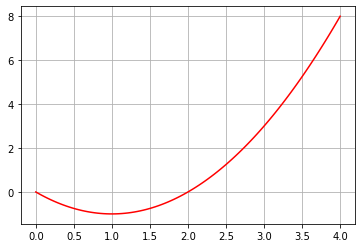

In [ ]:
x = np.linspace(0,4,100)
parametros = (1,1,-1) #tuplas
plt.plot(x,fun(x, *parametros), color='red')
plt.grid()

In [ ]:
from scipy.optimize import bisect

bisect(fun, 1, 2.5, args = parametros)

2.0000000000004547

## **Solución actividad 01:**

$ 7 = a\sqrt{x^2+1}+be^x\sin x $

In [ ]:
def fun1(x,a,b):
  return  7 - (b*np.exp(x)*np.sin(x)) - (a*np.sqrt(x**2 + 1))

In [ ]:
a=1
b=2
q = bisect(fun1, a, b, args=(1,1))
q

1.628718494926943

Text(1.628718494926943, 0, '1.63')

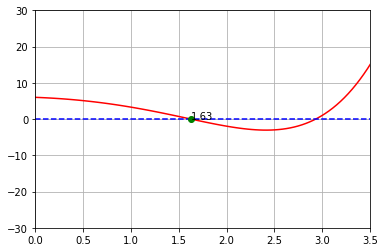

In [ ]:
plt.plot(x,fun1(x,1 ,1), color='red')
plt.grid()

# Raíz encontrada por el método de la bisección
root_ = q

# Línea horizontal que indica la raíz
plt.axhline(y=0, color='b', linestyle='--')

plt.xlim(0.0, 3.5)
plt.ylim(-30, 30)


plt.plot(q,0,"go")
plt.text(q,0,f"{q:.3}")

In [ ]:
a=0.5
b=1.5
p = bisect(fun1, a, b, args=(2,2))
p

0.954051251295823

Text(0.954051251295823, 0, '0.954')

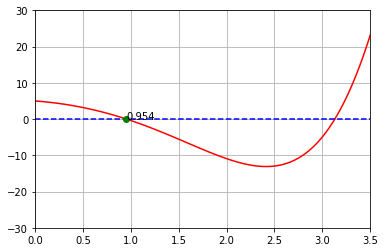

In [ ]:
plt.plot(x,fun1(x,2 ,2), color='red')
plt.grid()

# Raíz encontrada por el método de la bisección
root2 = p

# Línea horizontal que indica la raíz
plt.axhline(y=0, color='b', linestyle='--')

plt.xlim(0.0, 3.5)
plt.ylim(-30, 30)


plt.plot(p,0,"go")
plt.text(p,0,f"{p:.3}")

# **Solución actividad 02:**

$ ae^x-2 = bcos(e^x-2) $

In [ ]:
def fun_1(x,a,b):
  return (a*(np.exp(x))) - 2 - (b*np.cos((np.exp(x))-2))

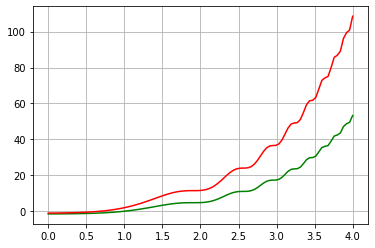

In [ ]:
plt.plot(x,fun_1(x,1 ,1), color='green')
plt.plot(x,fun_1(x,2 ,2), color='red')
plt.grid()

In [ ]:
a=0.5
b=1.5
w = bisect(fun_1, a, b, args=(1,1))
w

1.0076239716563578

(-30.0, 30.0)

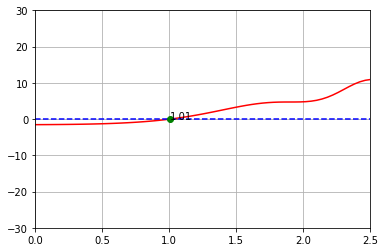

In [ ]:
plt.plot(x,fun_1(x,1 ,1), color='red')
plt.grid()

# Raíz encontrada por el método de la bisección
root1 = 1.0220861045975198
#root_ = 1.3300070385648723

# Línea horizontal que indica la raíz
plt.axhline(y=0, color='b', linestyle='--')


plt.plot(w,0,"go")
plt.text(w,0,f"{w:.3}")

plt.xlim(0.0, 2.5)
plt.ylim(-30, 30)

In [ ]:
a=0.5
b=2
z = bisect(fun_1, a, b, args=(2,2))
z

0.6931471805605725

(-30.0, 30.0)

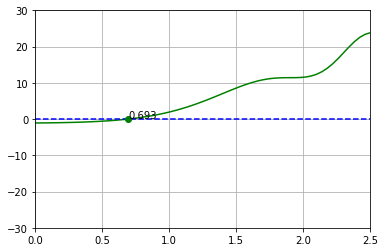

In [ ]:
plt.plot(x,fun_1(x,2 ,2), color='green')
plt.grid()

# Raíz encontrada por el método de la bisección
root_3 = z

# Línea horizontal que indica la raíz
plt.axhline(y=0, color='b', linestyle='--')

plt.plot(z,0,"go")
plt.text(z,0.2,f"{z:.3}")

plt.xlim(0.0, 2.5)
plt.ylim(-30, 30)

# **Solución actividad 03:**

**3.** Based on the routine NewtonRaphson, write your own routine SecantMethod

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pylab as plt

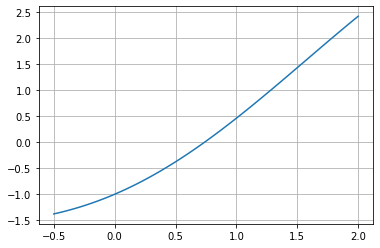

In [ ]:
def funt(x):
  f = x-np.cos(x)
  return f

x = np.linspace(-0.5,2,100)
plt.plot(x, funt(x))
plt.grid()

In [ ]:
# valor inicial de x, donde se espera que haya una raíz

funt(0.7)

-0.06484218728448854

In [ ]:
# Definir función como objeto de sympy

x = sp.symbols('x')

def funt(x):
  return x - sp.cos(x)

# Derivada de la función

fprima = sp.diff(funt(x), x)
fprima

sin(x) + 1

In [ ]:
from scipy import optimize

In [ ]:
funt_ = sp.lambdify(x,funt(x), "numpy")
fprima_ = sp.lambdify(x, fprima,"numpy")

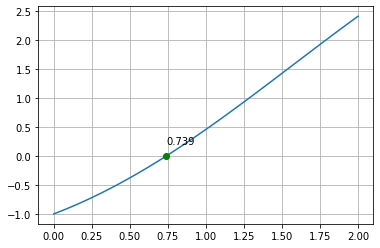

In [ ]:
x = np.linspace(0,2,100)
plt.plot(x, funt_(x))
P = optimize.newton(funt_,0.7, fprima_)
plt.plot(P,0,"go")
plt.text(P,0.2,f"{P:.3}")
plt.grid()

In [ ]:
from scipy.optimize import bisect

# Verificación con el método de bisección
bisect(funt, 1, -2.5)

0.7390851332163493

# **Ejercicio Punto fijo:**

In [ ]:
from scipy.optimize import fixed_point

#Punto fijo

x = np.linspace(-10,8,100)

def f_2(x):
  return  7 - np.exp(x)*np.sin(x)-np.sqrt(x**2 + 1) 

def g(x):
  g = x-(f_2(x))

  return g

a = fixed_point(g,2.5)

In [ ]:
# Defino un punto x_o y lo evaluo en g(x) 
x_o = 1

g(x_o)

point = fixed_point(g, x_o)
point

array(-6.92879849)

In [ ]:
def recta(x,m):
  y = x*m
  return y

In [ ]:
x1 = np.linspace(-200,200,100)

Text(0, -6.928798494348503, '-6.93')

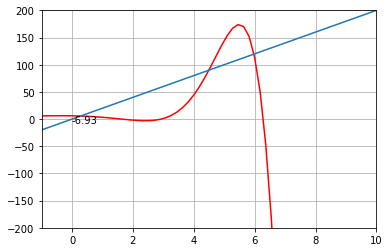

In [ ]:

plt.plot(x,f_2(x), color='red')
plt.plot(x1,recta(x1,20))

plt.grid()

plt.xlim(-1,10)
plt.ylim(-200,200)

plt.plot(point,0,"go")
plt.text(0,point,f"{point:.3}")

(-1000.0, 1000.0)

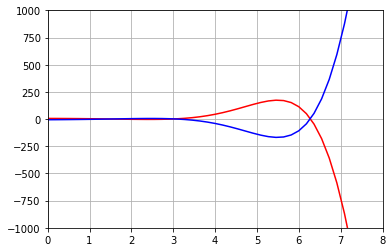

In [ ]:
plt.plot(x,f_2(x), color='red')
plt.plot(x,g(x), color='blue')
plt.grid()
plt.xlim(0,8)
plt.ylim(-1000,1000)

# **Solucion actividad 04:**

In [ ]:
from scipy import integrate

In [ ]:
from scipy.integrate import quad

In [ ]:
#Datos iniciales

m_tie  = 5.972 * (10**24)
m_pla = 5.40 * m_tie

rho = 5520

L = 6500 #Km

rho_0 = 18000

In [ ]:
#Funcion ya integrada

def finte(r):

  return (-468000000 * np.exp(-r/6500)*np.pi *(84500000 + 13000*r + r**2)) - 3.2045E25
 

In [ ]:
#Por el emtodo de punto fijo encontraremos los ceros

r = np.linspace(1,16000E3,10000)

def g(r):

  g = r - (finte(r))

  return g

In [ ]:
fixed_point(g,63710)

array(2.53729813e+36)

In [ ]:
po = fixed_point(g,63710)

print("El radio del planeta Mg832c es:", po, "metros")

El radio del planeta Mg832c es: 2.5372981310310385e+36 metros


In [ ]:
x1 = np.linspace(-200,200,100)

In [ ]:
#Funcion para la densidad

def densidad(rho_0,r,L):

  f = rho_0 * np.exp(-r/L)

  return f

In [ ]:
#Funcion de la masa
import sympy 

def masa(r):

  f1 = 4*np.pi
  r = sympy.Symbol('r')
  f = 8000 * (sympy.exp(-r/6500)) * (r**2)

  # Integrar
  f2 = sympy.integrate(f, (r, 0, r))

  f3 = 3.02*(10**16)

  y = (f1 * (f2)) - f3

  return y

In [ ]:
masa(r)

12.5663706143592*(-52000000*r**2 - 676000000000*r - 4394000000000000)*exp(-r/6500) + 2.50166324794942e+16

In [ ]:
from sympy.utilities.lambdify import lambdify

In [ ]:
import sympy

#Definir la funcion

r = sympy.Symbol('r')
f = 8000 * (sympy.exp(-r/6500)) * (r**2)

# Integrar
F = sympy.integrate(f, (r, 0, r))

print(F)

(-52000000*r**2 - 676000000000*r - 4394000000000000)*exp(-r/6500) + 4394000000000000


In [ ]:
r = sympy.Symbol('r')

inte = ((-52000000*r**2 - 676000000000*r - 4394000000000000)*sympy.exp(-r/6500) + 4394000000000000)

inte

(-52000000*r**2 - 676000000000*r - 4394000000000000)*exp(-r/6500) + 4394000000000000

In [ ]:
# Convertir la función simbólica en una función numérica
func_num = lambdify(r, inte, "numpy")

# Agregar un término lineal a la función numérica
func_num_mod = lambda r: 4*np.pi*(func_num(r)) + 3.02*(10**16)

In [ ]:
# Vectorizamos la función lambda para obtener una función en forma de arreglo numpy
#funcion_numpy = np.vectorize(F)

funcion_numpy = sp.lambdify(r, inte)

In [ ]:
import numpy as np
from scipy.optimize import fsolve

# Utilizamos la función fsolve() de scipy.optimize para encontrar las raíces
raices2 = fsolve(funcion_numpy, 1)
print(raices2)


[0.99987265]


/usr/local/lib/python3.9/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
